<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-geomechanics/blob/master/unconve/homework%205/homework5_unconve_geomech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 5. Reservoir Seismology**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# get wellA, wellB, wellC, wellD data from course webpage

!wget https://courses.edx.org/assets/courseware/v1/717146fd2ab45b7b2fe333806785188b/asset-v1:StanfordOnline+GEOPHYSX0004+1T2020+type@asset+block/GP208_HW5_Well_A.txt
!wget https://courses.edx.org/assets/courseware/v1/c61f00c835a6403f99d39b0420542599/asset-v1:StanfordOnline+GEOPHYSX0004+1T2020+type@asset+block/GP208_HW5_Well_B.txt
!wget https://courses.edx.org/assets/courseware/v1/7bd7ff0ac6115b772d4d7dd548b6a585/asset-v1:StanfordOnline+GEOPHYSX0004+1T2020+type@asset+block/GP208_HW5_Well_C.txt
!wget https://courses.edx.org/assets/courseware/v1/8a862ab410b9f3bbc4b55cbde6989240/asset-v1:StanfordOnline+GEOPHYSX0004+1T2020+type@asset+block/GP208_HW5_Well_D.txt

--2020-05-21 05:44:06--  https://courses.edx.org/assets/courseware/v1/717146fd2ab45b7b2fe333806785188b/asset-v1:StanfordOnline+GEOPHYSX0004+1T2020+type@asset+block/GP208_HW5_Well_A.txt
Resolving courses.edx.org (courses.edx.org)... 107.23.242.160, 54.209.244.105, 54.85.51.136
Connecting to courses.edx.org (courses.edx.org)|107.23.242.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221105 (216K) [text/plain]
Saving to: ‘GP208_HW5_Well_A.txt’

GP208_HW5_Well_A.tx 100%[===================>] 215.92K  --.-KB/s    in 0.04s   

2020-05-21 05:44:07 (5.36 MB/s) - ‘GP208_HW5_Well_A.txt’ saved [221105/221105]

--2020-05-21 05:44:10--  https://courses.edx.org/assets/courseware/v1/c61f00c835a6403f99d39b0420542599/asset-v1:StanfordOnline+GEOPHYSX0004+1T2020+type@asset+block/GP208_HW5_Well_B.txt
Resolving courses.edx.org (courses.edx.org)... 107.23.242.160, 54.209.244.105, 54.85.51.136
Connecting to courses.edx.org (courses.edx.org)|107.23.242.160|:443... connected.
HTTP

In [0]:
colnames = ["EventNumber","AcqDateLocal","AcqTimeLocal","OriginDateLocal","OriginTimeLocal","OriginTimePartS","TZ","Easting","Northing","Depth","Magnitude","Confidence","EventFile"]

well_a = pd.read_csv("/content/GP208_HW5_Well_A.txt", skiprows=1, delimiter="\t", names=colnames)
well_b = pd.read_csv("/content/GP208_HW5_Well_B.txt", skiprows=1, delimiter="\t", names=colnames)
well_c = pd.read_csv("/content/GP208_HW5_Well_C.txt", skiprows=1, delimiter="\t", names=colnames)
well_d = pd.read_csv("/content/GP208_HW5_Well_D.txt", skiprows=1, delimiter="\t", names=colnames)

well_a.head(10)

,EventNumber,AcqDateLocal,AcqTimeLocal,OriginDateLocal,OriginTimeLocal,OriginTimePartS,TZ,Easting,Northing,Depth,Magnitude,Confidence,EventFile
0,2395,40420,0.459873,40420,0.459873,0.928,-05:00,-528.80,4508.42,5612.38,-2.81,2.38,20140831t160213_794000z
1,2396,40420,0.459942,40420,0.459942,0.462,-05:00,-546.84,4478.53,5585.97,-2.79,1.52,20140831t160219_328250z
2,2397,40420,0.460301,40420,0.460301,0.488,-05:00,-369.76,4448.37,5724.29,-2.96,2.76,20140831t160250_342250z
3,2398,40420,0.464190,40420,0.464190,0.768,-05:00,-450.02,4449.97,5745.04,-2.72,2.15,20140831t160826_614250z
4,2399,40420,0.465231,40420,0.465231,0.672,-05:00,-465.37,4450.05,5702.69,-2.77,2.69,20140831t160956_509250z
5,2400,40420,0.466516,40420,0.466516,0.636,-05:00,-575.91,4508.30,5510.99,-2.59,3.22,20140831t161147_517500z
6,2401,40420,0.469086,40420,0.469086,0.188,-05:00,-473.13,4396.04,5735.92,-2.70,1.98,20140831t161529_047000z
7,2402,40420,0.470208,40420,0.470208,0.922,-05:00,-356.29,4461.45,5763.09,-2.76,1.89,20140831t161706_764250z
8,2403,40420,0.471887,40420,0.471887,0.259,-05:00,-238.75,4478.45,5728.36,-2.75,2.12,20140831t161931_098250z
9,2404,40420,0.472581,40420,0.472581,0.766,-05:00,-456.88,4448.34,5723.89,-2.68,1.47,20140831t162031_404500z


Text(0.5, 0.92, 'Well D')

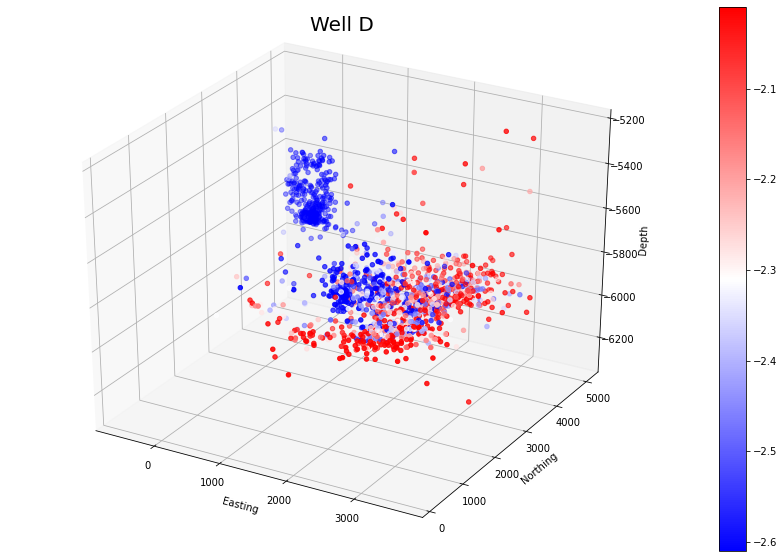

In [0]:
from mpl_toolkits.mplot3d import Axes3D

mag = well_d['Magnitude'].values
x = well_d['Easting'].values
y = well_d['Northing'].values
z = -well_d['Depth'].values

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(x, y, z, c=mag, cmap='bwr', vmin=min(mag)+1, vmax=max(mag)-1)

fig.colorbar(p)
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
ax.set_zlabel('Depth')
ax.set_title('Well D', size=20, pad=20)

## Part 1. Gutenberg-Richter Analysis

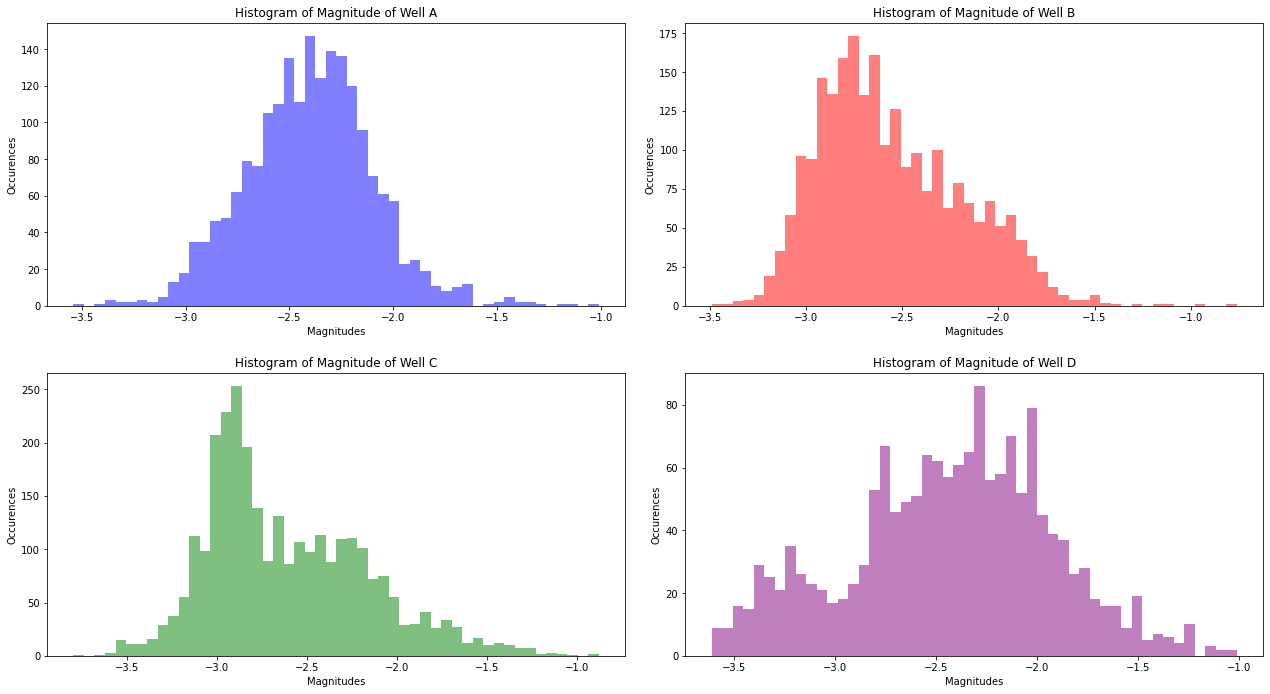

In [0]:
# plotting histogram of magnitudes of each well

plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
plt.hist(well_a['Magnitude'], bins=50, color='blue', alpha=0.5)
plt.title('Histogram of Magnitude of Well A')
plt.xlabel('Magnitudes'); plt.ylabel('Occurences')

plt.subplot(2,2,2)
plt.hist(well_b['Magnitude'], bins=50, color='red', alpha=0.5)
plt.title('Histogram of Magnitude of Well B')
plt.xlabel('Magnitudes'); plt.ylabel('Occurences')

plt.subplot(2,2,3)
plt.hist(well_c['Magnitude'], bins=50, color='green', alpha=0.5)
plt.title('Histogram of Magnitude of Well C')
plt.xlabel('Magnitudes'); plt.ylabel('Occurences')

plt.subplot(2,2,4)
plt.hist(well_d['Magnitude'], bins=50, color='purple', alpha=0.5)
plt.title('Histogram of Magnitude of Well D')
plt.xlabel('Magnitudes'); plt.ylabel('Occurences')

plt.tight_layout(pad=2)
plt.show()

### A. Plot Gutenberg-Richter $log(N \geq M)$ vs. $M$ 

In [0]:
mag_all = np.concatenate([np.array(well_a['Magnitude']), np.array(well_b['Magnitude']), 
                          np.array(well_c['Magnitude']), np.array(well_d['Magnitude'])])

min_mag_all = min(mag_all); max_mag_all = max(mag_all)
print('Minimum magnitude (M) of all the recorded earthquakes of all wells:', min_mag_all, 'and maximum M:', max_mag_all)

" compute cumulative events more than -3.8 for per bins "

num_bins = 100 # number of bins
bins = np.linspace(min_mag_all, max_mag_all, num_bins) # magnitude bins

# this will compute number of events between two bins e.g. N events between M=1 and M=2 (1<N<2)
well_a_hist = np.histogram(well_a['Magnitude'], bins)
well_b_hist = np.histogram(well_b['Magnitude'], bins)
well_c_hist = np.histogram(well_c['Magnitude'], bins)
well_d_hist = np.histogram(well_d['Magnitude'], bins)

# this will revert the number of events between two bins
well_a_hist_r = well_a_hist[0][::-1]
well_b_hist_r = well_b_hist[0][::-1]
well_c_hist_r = well_c_hist[0][::-1]
well_d_hist_r = well_d_hist[0][::-1]

# cumulative sum of the reverted number of events between two bins
# to compute number of events above certain mag (N>=M), started from the largest magnitude
cumsum_well_a = np.cumsum(well_a_hist_r)
cumsum_well_b = np.cumsum(well_b_hist_r)
cumsum_well_c = np.cumsum(well_c_hist_r)
cumsum_well_d = np.cumsum(well_d_hist_r)

print('Number of events above max magnitude', max_mag_all, 'is', 0, 'in well A, ', 0, 'in well B, ', 0, 'in well C, and', 0, 'in well D.')
print('Number of events above the second max magnitude bin', np.round(bins[-2], 2), 'is', cumsum_well_a[0], 'in well A, ', cumsum_well_b[0], 'in well B, ', cumsum_well_c[0], 'in well C, and', cumsum_well_d[0], 'in well D.')
print('Number of events above min magnitude', min_mag_all, 'is', cumsum_well_a[-1], 'in well A, ', cumsum_well_b[-1], 'in well B, ', cumsum_well_c[-1], 'in well C, and', cumsum_well_d[-1], 'in well D.')

# finally append zero (0) to the first element of cumulative sum array
cumsum_well_a = np.append(0, cumsum_well_a)
cumsum_well_b = np.append(0, cumsum_well_b)
cumsum_well_c = np.append(0, cumsum_well_c)
cumsum_well_d = np.append(0, cumsum_well_d)

# our bins are ordered from smallest to largest, but our cumulative events are ordered from largest to smallest
# so revert again our cumulative events 
# cumsum_well_a = cumsum_well_a[::-1]
# cumsum_well_b = cumsum_well_b[::-1]
# cumsum_well_c = cumsum_well_c[::-1]
# cumsum_well_d = cumsum_well_d[::-1]

Minimum magnitude (M) of all the recorded earthquakes of all wells: -3.8 and maximum M: -0.76
Number of events above max magnitude -0.76 is 0 in well A,  0 in well B,  0 in well C, and 0 in well D.
Number of events above the second max magnitude bin -0.79 is 0 in well A,  1 in well B,  0 in well C, and 0 in well D.
Number of events above min magnitude -3.8 is 1967 in well A,  2394 in well B,  2920 in well C, and 1584 in well D.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


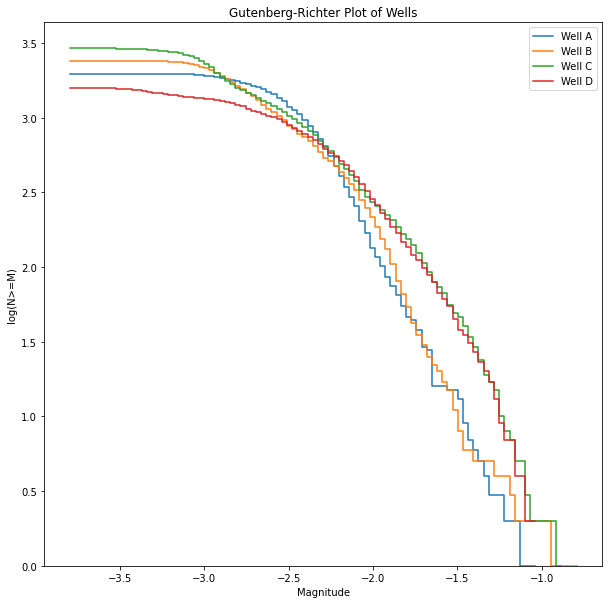

In [0]:
# plot the log(cumulative events) or log(N>M) vs magnitude

# log the cumulative events
log_cumsum_well_a = np.log10(cumsum_well_a[::-1])
log_cumsum_well_b = np.log10(cumsum_well_b[::-1])
log_cumsum_well_c = np.log10(cumsum_well_c[::-1])
log_cumsum_well_d = np.log10(cumsum_well_d[::-1])

plt.figure(figsize=(10,10))
plt.step(bins, log_cumsum_well_a, label="Well A")
plt.step(bins, log_cumsum_well_b, label="Well B")
plt.step(bins, log_cumsum_well_c, label="Well C")
plt.step(bins, log_cumsum_well_d, label="Well D")

plt.title('Gutenberg-Richter Plot of Wells')
plt.legend()
plt.xlabel('Magnitude')
plt.ylabel('log(N>=M)')
plt.ylim(ymin=0)

plt.show()

### Jump to C. Determine b-values of the 4 wells

I use `Plotly` to find the cutoff. Adjust with whichever well you'd like to analyse, place the cursor on the plot to hover over, and get the cutoff.

In [0]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=np.round(bins, 4), y=log_cumsum_well_c,
                    mode='lines+markers',
                    name='magnitude well'))

fig.update_layout(
    title={
        'text': "Gutenberg-Richter Plot of Well C",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

Magnitude cutoffs obtained (magnitude has been rounded to 4 decimals):

* Well A: -2.2646
* Well B: -2.0804
* Well C: -2.3875
* Well D: -2.2032

Next, using `np.where()` to find the `index` of the cutoff where the arrays of `bins` and `log_cumsum_well_xxxx` have to be sliced off.

Some results of `log_cumsum_well_xxxx` comes in `-inf` (because $log(0) = -\infty$ when $N=0$), this also should be cleaned off. 

Do regression using `np.polyfit` to get `a` and `b` from equation $log(N)=a-bM$, finally plot the regression line.

In [0]:
# find index of cutoff
bins_round = np.round(bins, 4)

index_a = np.where(bins_round == -2.2646)[0][0]
index_b = np.where(bins_round == -2.0804)[0][0]
index_c = np.where(bins_round == -2.4182)[0][0]
index_d = np.where(bins_round == -2.2032)[0][0]

# slicing magnitude bins and cumulative event arrays
bins_a = bins[index_a:]
bins_b = bins[index_b:]
bins_c = bins[index_c:]
bins_d = bins[index_d:]

cum_a = log_cumsum_well_a[index_a:]
cum_b = log_cumsum_well_b[index_b:]
cum_c = log_cumsum_well_c[index_c:]
cum_d = log_cumsum_well_d[index_d:]

# clean off the -inf values, first find index at array cumsum, then slice both cumsum and bins array
idinf_a = np.where(np.isinf(cum_a))[0][0]
idinf_b = np.where(np.isinf(cum_b))[0][0]
idinf_c = np.where(np.isinf(cum_c))[0][0]
idinf_d = np.where(np.isinf(cum_d))[0][0]


clean_cum_a = cum_a[:idinf_a]
clean_cum_b = cum_b[:idinf_b]
clean_cum_c = cum_c[:idinf_c]
clean_cum_d = cum_d[:idinf_d]


clean_bins_a = bins_a[:idinf_a]
clean_bins_b = bins_b[:idinf_b]
clean_bins_c = bins_c[:idinf_c]
clean_bins_d = bins_d[:idinf_d]


b_A, a_A = np.polyfit(clean_bins_a, clean_cum_a, deg=1) # b (slope) and a (intercept) of well A
b_B, a_B = np.polyfit(clean_bins_b, clean_cum_b, deg=1) # b (slope) and a (intercept) of well B
b_C, a_C = np.polyfit(clean_bins_c, clean_cum_c, deg=1) # b (slope) and a (intercept) of well C
b_D, a_D = np.polyfit(clean_bins_d, clean_cum_d, deg=1) # b (slope) and a (intercept) of well D


print('b-value of Well A:', -b_A)
print('b-value of Well B:', -b_B)
print('b-value of Well C:', -b_C)
print('b-value of Well D:', -b_D)


b-value of Well A: 2.2905977209649935
b-value of Well B: 2.0236367714742394
b-value of Well C: 1.866161989933815
b-value of Well D: 1.96543742365093


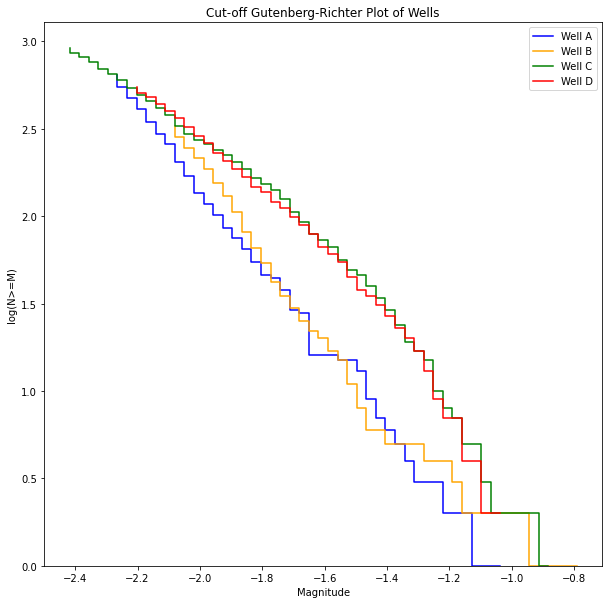

In [0]:
plt.figure(figsize=(10,10))
plt.step(clean_bins_a, clean_cum_a, label="Well A", color='blue')
plt.step(clean_bins_b, clean_cum_b, label="Well B", color='orange')
plt.step(clean_bins_c, clean_cum_c, label="Well C", color='green')
plt.step(clean_bins_d, clean_cum_d, label="Well D", color='red')

plt.title('Cut-off Gutenberg-Richter Plot of Wells')
plt.legend()
plt.xlabel('Magnitude')
plt.ylabel('log(N>=M)')
plt.ylim(ymin=0)

plt.show()

### B. Find the Lowest Magnitude ($M$ at which the cumulative number of events is 5% of the total number of events)

In [0]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

Text(0, 0.5, 'Cumulative Distribution Function')

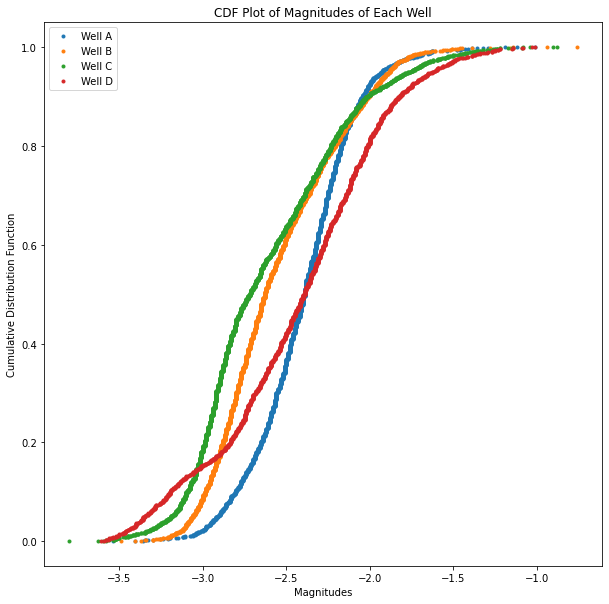

In [0]:
xa, ya = ecdf(well_a['Magnitude'])
xb, yb = ecdf(well_b['Magnitude'])
xc, yc = ecdf(well_c['Magnitude'])
xd, yd = ecdf(well_d['Magnitude'])

plt.figure(figsize=(10,10))

plt.plot(xa, ya, '.', label='Well A')
plt.plot(xb, yb, '.', label='Well B')
plt.plot(xc, yc, '.', label='Well C')
plt.plot(xd, yd, '.', label='Well D')
plt.title('CDF Plot of Magnitudes of Each Well')
plt.legend()
plt.xlabel('Magnitudes'); plt.ylabel('Cumulative Distribution Function')

In [0]:
# for well A
rounded_a_cdf = np.round(ya, 3)
find_5a_percent = np.where(rounded_a_cdf == 0.050)
magnitude_a_arr = []

for i in range(len(find_5a_percent[0])):
  magnitude_a_ = xa[find_5a_percent[0][i]]
  magnitude_a_arr.append(magnitude_a_)

lowest_mag_a = np.mean(magnitude_a_arr)
print('Well A lowest magnitude at which the cumulative number of events is 5% of the total number of events:', lowest_mag_a)

# for well B
rounded_b_cdf = np.round(yb, 3)
find_5b_percent = np.where(rounded_b_cdf == 0.050)
magnitude_b_arr = []

for i in range(len(find_5b_percent[0])):
  magnitude_b_ = xb[find_5b_percent[0][i]]
  magnitude_b_arr.append(magnitude_b_)

lowest_mag_b = np.mean(magnitude_b_arr)
print('Well B lowest magnitude at which the cumulative number of events is 5% of the total number of events:', lowest_mag_b)

# for well C
rounded_c_cdf = np.round(yc, 3)
find_5c_percent = np.where(rounded_c_cdf == 0.050)
magnitude_c_arr = []

for i in range(len(find_5c_percent[0])):
  magnitude_c_ = xc[find_5c_percent[0][i]]
  magnitude_c_arr.append(magnitude_c_)

lowest_mag_c = np.mean(magnitude_c_arr)
print('Well C lowest magnitude at which the cumulative number of events is 5% of the total number of events:', lowest_mag_c)

# for well D
rounded_d_cdf = np.round(yd, 3)
find_5d_percent = np.where(rounded_d_cdf == 0.050)
magnitude_d_arr = []

for i in range(len(find_5d_percent[0])):
  magnitude_d_ = xd[find_5d_percent[0][i]]
  magnitude_d_arr.append(magnitude_d_)

lowest_mag_d = np.mean(magnitude_d_arr)
print('Well D lowest magnitude at which the cumulative number of events is 5% of the total number of events:', lowest_mag_d)

Well A lowest magnitude at which the cumulative number of events is 5% of the total number of events: -2.91
Well B lowest magnitude at which the cumulative number of events is 5% of the total number of events: -3.06
Well C lowest magnitude at which the cumulative number of events is 5% of the total number of events: -3.19
Well D lowest magnitude at which the cumulative number of events is 5% of the total number of events: -3.35


## Part 2. Seismic Moment and Surface Area

Determine the seismic moment, $M_0$ using the equation below.

$$ M_w=\frac{2}{3} (log_{10}M_0-9)$$

Re-arranging the equation becomes:

$$ M_0 = 10 ^{\frac{3M_w}{2} +9}$$

In [0]:
M0_a = 10**((3 * well_a['Magnitude'] / 2) + 9)
M0_b = 10**((3 * well_b['Magnitude'] / 2) + 9)
M0_c = 10**((3 * well_c['Magnitude'] / 2) + 9)
M0_d = 10**((3 * well_d['Magnitude'] / 2) + 9)

print('Total seismic moment in Well A:', sum(M0_a))
print('Total seismic moment in Well B:', sum(M0_b))
print('Total seismic moment in Well C:', sum(M0_c))
print('Total seismic moment in Well D:', sum(M0_d))

Total seismic moment in Well A: 934687598.5997992
Total seismic moment in Well B: 1006178607.050319
Total seismic moment in Well C: 1606197224.225522
Total seismic moment in Well D: 1415936334.3759482


Assume a unifrom stress drop for all events $\Delta \tau = 0.5 MPa$, and a circular fault patch. Calculate the total surface area using this equation.

$$ \pi r^2 = S = \pi (\frac {7M_0}{16\Delta\tau})^\frac{2}{3} $$

In [0]:
stress_drop = 0.5 * 1E+06 # MPa to Pa

area_a = np.pi * ((7 * M0_a) / (16 * stress_drop))**(2/3)
area_b = np.pi * ((7 * M0_b) / (16 * stress_drop))**(2/3)
area_c = np.pi * ((7 * M0_c) / (16 * stress_drop))**(2/3)
area_d = np.pi * ((7 * M0_d) / (16 * stress_drop))**(2/3)

Area_D=np.pi*np.power((7*M0_d)/(16*0.5*10.0**6.),2/3)

print('Total fault surface area in Well A:', sum(area_a), 'm2')
print('Total fault surface area in Well B:', sum(area_b), 'm2')
print('Total fault surface area in Well C:', sum(area_c), 'm2')
print('Total fault surface area in Well D:', sum(area_d), 'm2')

Total fault surface area in Well A: 2923.782636817326 m2
Total fault surface area in Well B: 2954.414617810344 m2
Total fault surface area in Well C: 3902.1097080397126 m2
Total fault surface area in Well D: 3186.7472790454185 m2
